In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#check the last time the notebook was run
import datetime
print(f"The last time the notebook was run is:{datetime.datetime.now()}")

The last time the notebook was run is:2024-02-19 17:01:28.489245


In [3]:
#read in the dataset
df=pd.read_csv("classification_train.csv")
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
#check if there are any missing values in the dataset
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

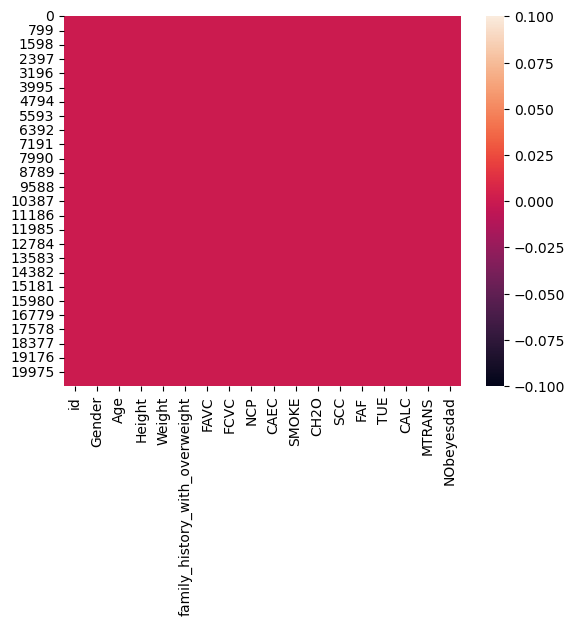

In [5]:
sns.heatmap(df.isna());

In [6]:
#check the inforamtion of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
df["NObeyesdad"].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [8]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


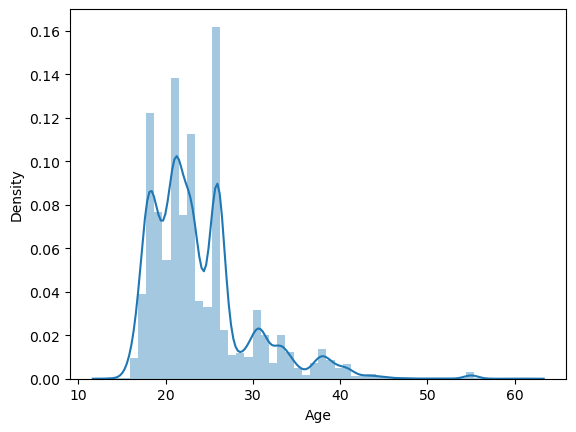

In [9]:
#check the distribution of the age column
sns.distplot(df["Age"]);

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


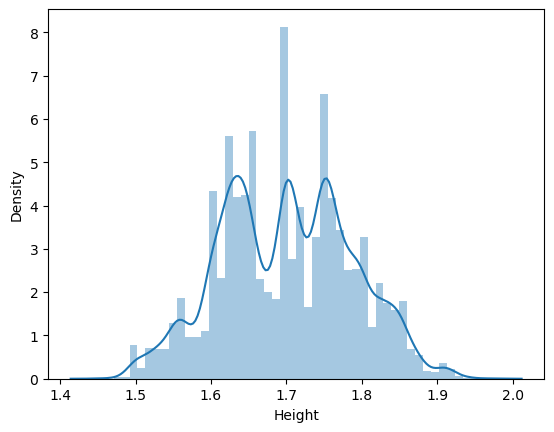

In [10]:
#check the distribution of the height column
sns.distplot(df.Height);

In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


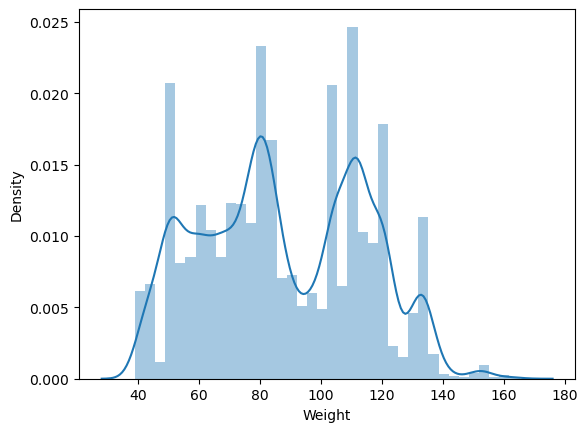

In [12]:
sns.distplot(df["Weight"]);

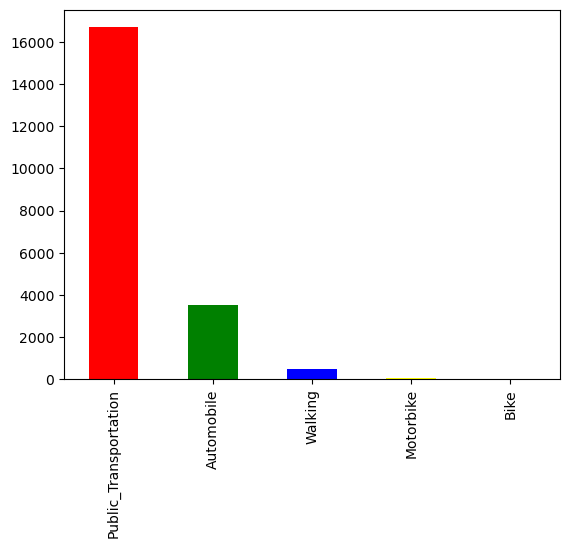

In [13]:
df["MTRANS"].value_counts().plot(kind="bar",color=["Red","Green","Blue","Yellow"]);


<AxesSubplot:>

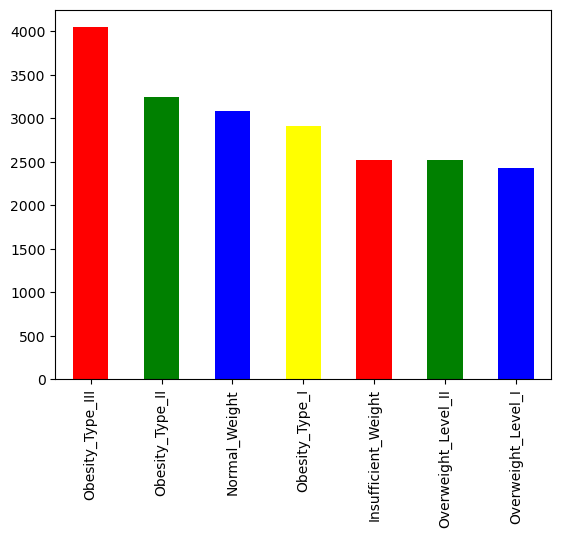

In [14]:
df["NObeyesdad"].value_counts().plot(kind="bar",color=["Red","Green","Blue","Yellow"])

In [15]:
df["CALC"].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

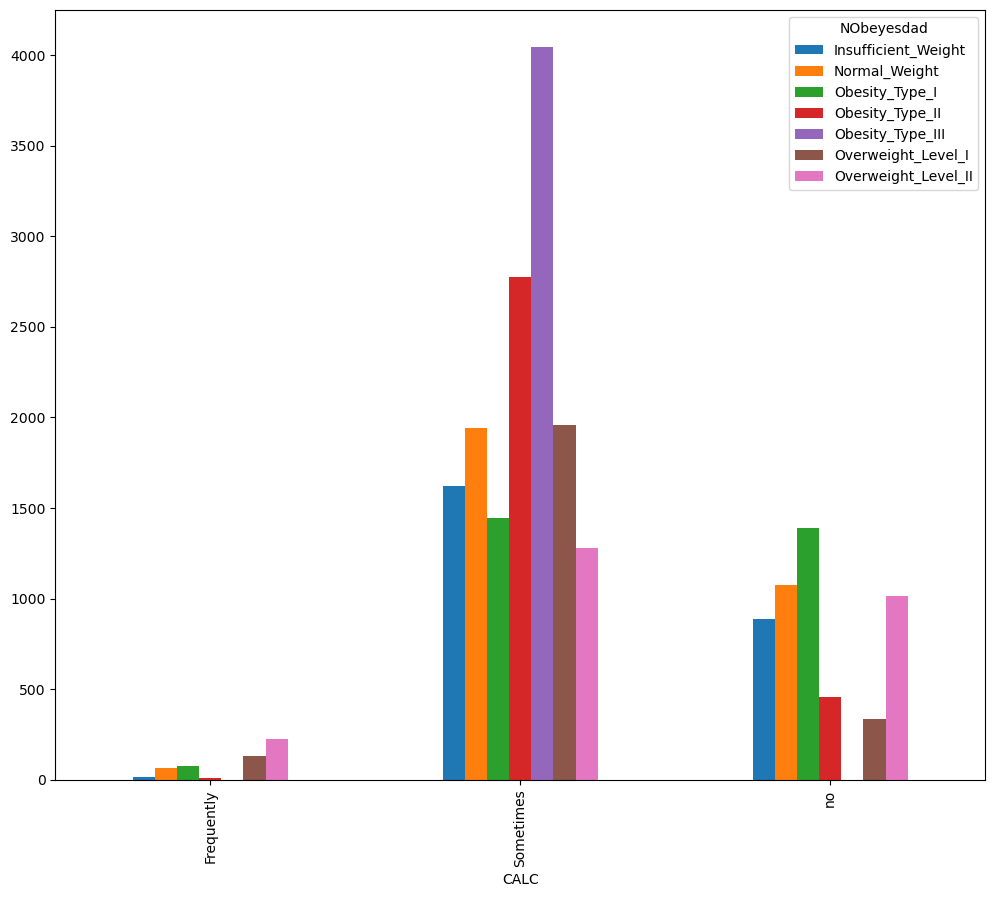

In [16]:
pd.crosstab(df["CALC"],df["NObeyesdad"]).plot(kind="bar",
                                             figsize=(12,10));

<AxesSubplot:xlabel='MTRANS'>

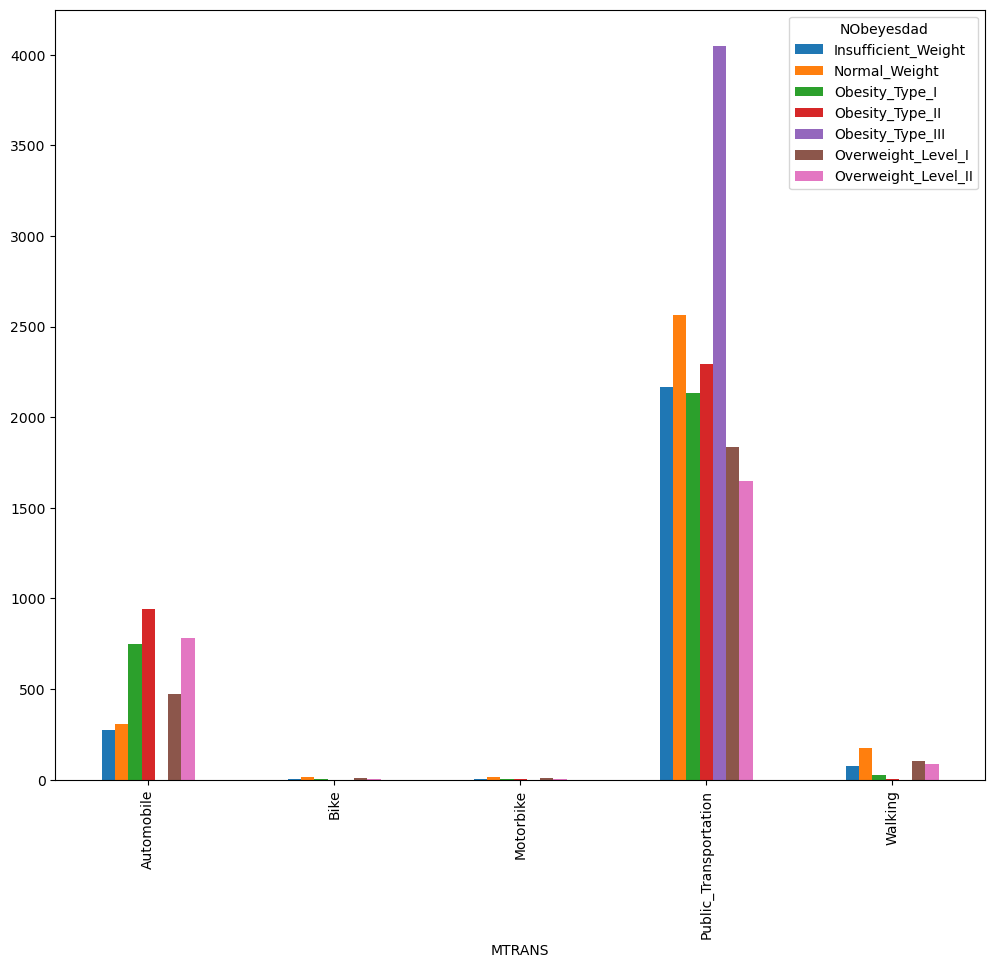

In [17]:
#check the relationship between the Means of transport and the target column

pd.crosstab(df["MTRANS"],df["NObeyesdad"]).plot(kind="bar",
                                               figsize=(12,10))

In [18]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [19]:
df["family_history_with_overweight"].value_counts()

yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64

<AxesSubplot:xlabel='family_history_with_overweight'>

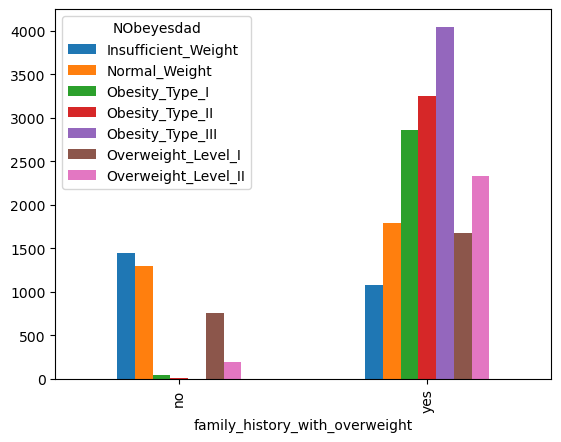

In [20]:
pd.crosstab(df["family_history_with_overweight"],df["NObeyesdad"]).plot(kind="bar")

<AxesSubplot:xlabel='SMOKE'>

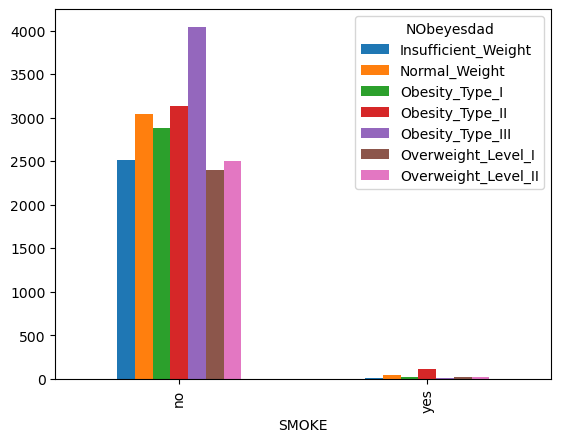

In [21]:
pd.crosstab(df["SMOKE"],df["NObeyesdad"]).plot(kind="bar")

In [22]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
#check the value_counts of the female column
df["Gender"].value_counts()

Female    10422
Male      10336
Name: Gender, dtype: int64

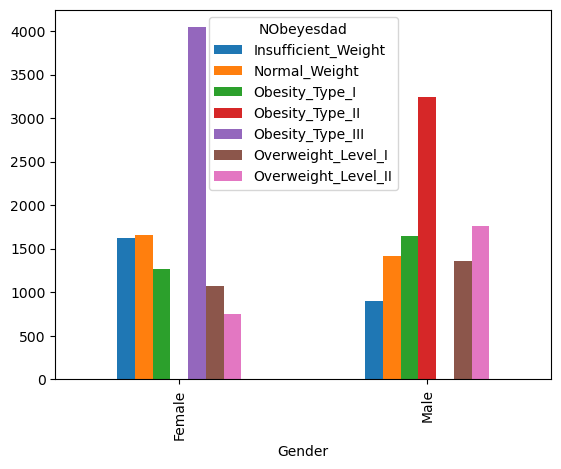

In [24]:
pd.crosstab(df["Gender"],df["NObeyesdad"]).plot(kind="bar");

<AxesSubplot:xlabel='CAEC'>

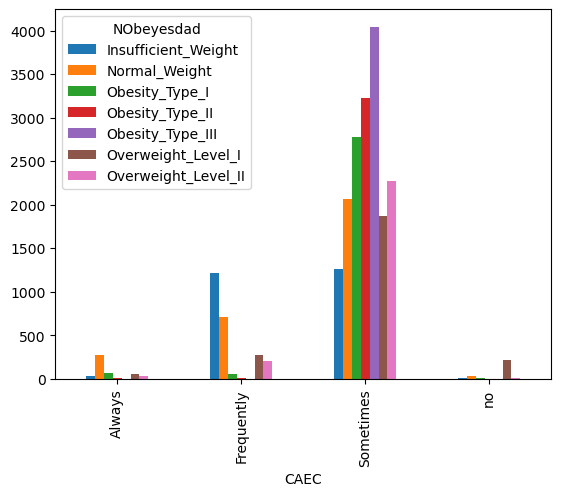

In [25]:
pd.crosstab(df["CAEC"],df["NObeyesdad"]).plot(kind="bar")

In [26]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
df["SCC"].value_counts()

no     20071
yes      687
Name: SCC, dtype: int64

<AxesSubplot:xlabel='SCC'>

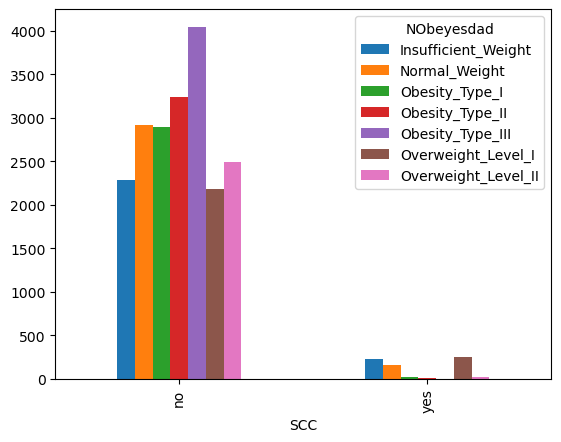

In [28]:
pd.crosstab(df["SCC"],df["NObeyesdad"]).plot(kind="bar")

## WE have done a little of EXPLORATORY DATA ANALYSIS(EDA)we can always do meore but lets now drop to modelling


Before we build a machine learning model we have to first ensure that all of our data is in numbers and that all of the 
missing values in the dataset are filled 

In [29]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [30]:
#check the rows in the dataset that have numeric columns
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

id
Age
Height
Weight
FCVC
NCP
CH2O
FAF
TUE


In [31]:
#check the columns in our dataset that have categorical columns
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS
NObeyesdad


In [32]:
#Lets convert the columns with strings to categories 
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        #convert the strings into categories 
        df[label]=content.astype("category").cat.as_ordered()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20758 non-null  int64   
 1   Gender                          20758 non-null  category
 2   Age                             20758 non-null  float64 
 3   Height                          20758 non-null  float64 
 4   Weight                          20758 non-null  float64 
 5   family_history_with_overweight  20758 non-null  category
 6   FAVC                            20758 non-null  category
 7   FCVC                            20758 non-null  float64 
 8   NCP                             20758 non-null  float64 
 9   CAEC                            20758 non-null  category
 10  SMOKE                           20758 non-null  category
 11  CH2O                            20758 non-null  float64 
 12  SCC               

In [34]:
df["NObeyesdad"].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [35]:
#convert the categories in the dataset to numbers so that we can build our model
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
       #turn the categories into numbers 
        df[label]=pd.Categorical(content).codes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int8   
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int8   
 6   FAVC                            20758 non-null  int8   
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int8   
 10  SMOKE                           20758 non-null  int8   
 11  CH2O                            20758 non-null  float64
 12  SCC                             

##  Modelling 

Now that we have converted all the data into numbers and that we have ensured that the data has no missing values,Lets build a model to find the patterns for us

We shall start by splitting the data into features and variables,split the data into training and testing splits,create a function to fit and score the models 



In [37]:
#split the data into features and variables

X=df.drop("NObeyesdad",axis=1)
y=df["NObeyesdad"]

In [38]:
#check the shapes of X & y
X.shape,y.shape

((20758, 17), (20758,))

In [39]:
#split the data into training and test splits 

#set the random seed for reproducibility
np.random.seed(42)

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16606, 17), (4152, 17), (16606,), (4152,))

## create a function to fit and score our models


In [40]:
#create an empty dictionary to put our models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


models={"Random Forest":RandomForestClassifier(),
       "Linear_model":LogisticRegression(),
       "Neighbors":KNeighborsClassifier(),
       "Catboost":CatBoostClassifier(),
       "Xgboost":XGBClassifier()}

#create an empty dictionary to store the model scores 
model_scores={}

# Loop through the models,fit them to the data and append the score on the empty dictionary
for name,model in models.items():
    #fit the taining data to the models
    model.fit(X_train,y_train)
    #score the model
    model_scores[name]=model.score(X_test,y_test)
    
return model_scores


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = sta

Learning rate set to 0.091318
0:	learn: 1.6514135	total: 282ms	remaining: 4m 41s
1:	learn: 1.4664755	total: 313ms	remaining: 2m 36s
2:	learn: 1.3267997	total: 344ms	remaining: 1m 54s
3:	learn: 1.2204047	total: 374ms	remaining: 1m 33s
4:	learn: 1.1250128	total: 405ms	remaining: 1m 20s
5:	learn: 1.0519223	total: 436ms	remaining: 1m 12s
6:	learn: 0.9864737	total: 467ms	remaining: 1m 6s
7:	learn: 0.9291548	total: 501ms	remaining: 1m 2s
8:	learn: 0.8803871	total: 538ms	remaining: 59.3s
9:	learn: 0.8348234	total: 569ms	remaining: 56.3s
10:	learn: 0.7980756	total: 600ms	remaining: 54s
11:	learn: 0.7625434	total: 635ms	remaining: 52.3s
12:	learn: 0.7276825	total: 665ms	remaining: 50.5s
13:	learn: 0.7004053	total: 698ms	remaining: 49.2s
14:	learn: 0.6764607	total: 738ms	remaining: 48.5s
15:	learn: 0.6509015	total: 773ms	remaining: 47.5s
16:	learn: 0.6295773	total: 807ms	remaining: 46.7s
17:	learn: 0.6088302	total: 840ms	remaining: 45.8s
18:	learn: 0.5904174	total: 873ms	remaining: 45.1s
19:	lea

166:	learn: 0.2657489	total: 5.2s	remaining: 25.9s
167:	learn: 0.2651891	total: 5.22s	remaining: 25.9s
168:	learn: 0.2647629	total: 5.25s	remaining: 25.8s
169:	learn: 0.2642576	total: 5.28s	remaining: 25.8s
170:	learn: 0.2639892	total: 5.31s	remaining: 25.7s
171:	learn: 0.2635903	total: 5.33s	remaining: 25.7s
172:	learn: 0.2630394	total: 5.36s	remaining: 25.6s
173:	learn: 0.2627258	total: 5.39s	remaining: 25.6s
174:	learn: 0.2622642	total: 5.42s	remaining: 25.6s
175:	learn: 0.2618009	total: 5.45s	remaining: 25.5s
176:	learn: 0.2614683	total: 5.48s	remaining: 25.5s
177:	learn: 0.2609990	total: 5.51s	remaining: 25.4s
178:	learn: 0.2604915	total: 5.54s	remaining: 25.4s
179:	learn: 0.2598569	total: 5.57s	remaining: 25.4s
180:	learn: 0.2595776	total: 5.6s	remaining: 25.3s
181:	learn: 0.2590954	total: 5.63s	remaining: 25.3s
182:	learn: 0.2585316	total: 5.66s	remaining: 25.3s
183:	learn: 0.2583179	total: 5.69s	remaining: 25.3s
184:	learn: 0.2580406	total: 5.72s	remaining: 25.2s
185:	learn: 0.

328:	learn: 0.2176957	total: 10.3s	remaining: 21s
329:	learn: 0.2175463	total: 10.3s	remaining: 21s
330:	learn: 0.2173526	total: 10.4s	remaining: 20.9s
331:	learn: 0.2171703	total: 10.4s	remaining: 20.9s
332:	learn: 0.2169537	total: 10.4s	remaining: 20.9s
333:	learn: 0.2167999	total: 10.4s	remaining: 20.8s
334:	learn: 0.2166248	total: 10.5s	remaining: 20.8s
335:	learn: 0.2162714	total: 10.5s	remaining: 20.7s
336:	learn: 0.2159434	total: 10.5s	remaining: 20.7s
337:	learn: 0.2158311	total: 10.6s	remaining: 20.7s
338:	learn: 0.2154996	total: 10.6s	remaining: 20.6s
339:	learn: 0.2152403	total: 10.6s	remaining: 20.6s
340:	learn: 0.2150456	total: 10.7s	remaining: 20.6s
341:	learn: 0.2147972	total: 10.7s	remaining: 20.6s
342:	learn: 0.2146365	total: 10.7s	remaining: 20.5s
343:	learn: 0.2144647	total: 10.7s	remaining: 20.5s
344:	learn: 0.2142637	total: 10.8s	remaining: 20.5s
345:	learn: 0.2140518	total: 10.8s	remaining: 20.4s
346:	learn: 0.2137146	total: 10.8s	remaining: 20.4s
347:	learn: 0.21

493:	learn: 0.1876835	total: 15s	remaining: 15.4s
494:	learn: 0.1875107	total: 15s	remaining: 15.4s
495:	learn: 0.1873040	total: 15.1s	remaining: 15.3s
496:	learn: 0.1871389	total: 15.1s	remaining: 15.3s
497:	learn: 0.1869884	total: 15.1s	remaining: 15.3s
498:	learn: 0.1868046	total: 15.2s	remaining: 15.2s
499:	learn: 0.1866990	total: 15.2s	remaining: 15.2s
500:	learn: 0.1865596	total: 15.2s	remaining: 15.2s
501:	learn: 0.1863166	total: 15.2s	remaining: 15.1s
502:	learn: 0.1861226	total: 15.3s	remaining: 15.1s
503:	learn: 0.1859767	total: 15.3s	remaining: 15.1s
504:	learn: 0.1858642	total: 15.3s	remaining: 15s
505:	learn: 0.1856843	total: 15.4s	remaining: 15s
506:	learn: 0.1855589	total: 15.4s	remaining: 15s
507:	learn: 0.1853870	total: 15.4s	remaining: 14.9s
508:	learn: 0.1852943	total: 15.4s	remaining: 14.9s
509:	learn: 0.1852129	total: 15.5s	remaining: 14.9s
510:	learn: 0.1851427	total: 15.5s	remaining: 14.8s
511:	learn: 0.1849287	total: 15.5s	remaining: 14.8s
512:	learn: 0.1847733	

658:	learn: 0.1644623	total: 19.8s	remaining: 10.2s
659:	learn: 0.1643736	total: 19.8s	remaining: 10.2s
660:	learn: 0.1642426	total: 19.8s	remaining: 10.2s
661:	learn: 0.1640184	total: 19.8s	remaining: 10.1s
662:	learn: 0.1638785	total: 19.9s	remaining: 10.1s
663:	learn: 0.1637101	total: 19.9s	remaining: 10.1s
664:	learn: 0.1635644	total: 19.9s	remaining: 10s
665:	learn: 0.1634663	total: 20s	remaining: 10s
666:	learn: 0.1633195	total: 20s	remaining: 9.98s
667:	learn: 0.1632445	total: 20s	remaining: 9.95s
668:	learn: 0.1631590	total: 20s	remaining: 9.92s
669:	learn: 0.1629814	total: 20.1s	remaining: 9.89s
670:	learn: 0.1628216	total: 20.1s	remaining: 9.86s
671:	learn: 0.1627495	total: 20.1s	remaining: 9.82s
672:	learn: 0.1625179	total: 20.2s	remaining: 9.79s
673:	learn: 0.1623771	total: 20.2s	remaining: 9.77s
674:	learn: 0.1622875	total: 20.2s	remaining: 9.73s
675:	learn: 0.1621354	total: 20.2s	remaining: 9.7s
676:	learn: 0.1620591	total: 20.3s	remaining: 9.67s
677:	learn: 0.1619647	tot

822:	learn: 0.1461746	total: 24.5s	remaining: 5.28s
823:	learn: 0.1460711	total: 24.6s	remaining: 5.25s
824:	learn: 0.1459292	total: 24.6s	remaining: 5.22s
825:	learn: 0.1458120	total: 24.6s	remaining: 5.19s
826:	learn: 0.1457132	total: 24.7s	remaining: 5.16s
827:	learn: 0.1456549	total: 24.7s	remaining: 5.13s
828:	learn: 0.1455376	total: 24.7s	remaining: 5.1s
829:	learn: 0.1454585	total: 24.7s	remaining: 5.07s
830:	learn: 0.1454335	total: 24.8s	remaining: 5.04s
831:	learn: 0.1453059	total: 24.8s	remaining: 5.01s
832:	learn: 0.1452197	total: 24.8s	remaining: 4.98s
833:	learn: 0.1451431	total: 24.9s	remaining: 4.95s
834:	learn: 0.1450416	total: 24.9s	remaining: 4.92s
835:	learn: 0.1449145	total: 24.9s	remaining: 4.89s
836:	learn: 0.1448596	total: 24.9s	remaining: 4.86s
837:	learn: 0.1447804	total: 25s	remaining: 4.83s
838:	learn: 0.1446667	total: 25s	remaining: 4.8s
839:	learn: 0.1446280	total: 25s	remaining: 4.77s
840:	learn: 0.1445220	total: 25.1s	remaining: 4.74s
841:	learn: 0.144423

981:	learn: 0.1317499	total: 29.3s	remaining: 536ms
982:	learn: 0.1316385	total: 29.3s	remaining: 507ms
983:	learn: 0.1315273	total: 29.3s	remaining: 477ms
984:	learn: 0.1314205	total: 29.3s	remaining: 447ms
985:	learn: 0.1313293	total: 29.4s	remaining: 417ms
986:	learn: 0.1312829	total: 29.4s	remaining: 387ms
987:	learn: 0.1312034	total: 29.4s	remaining: 358ms
988:	learn: 0.1311350	total: 29.5s	remaining: 328ms
989:	learn: 0.1310845	total: 29.5s	remaining: 298ms
990:	learn: 0.1310428	total: 29.5s	remaining: 268ms
991:	learn: 0.1309946	total: 29.5s	remaining: 238ms
992:	learn: 0.1309224	total: 29.6s	remaining: 208ms
993:	learn: 0.1308758	total: 29.6s	remaining: 179ms
994:	learn: 0.1308092	total: 29.6s	remaining: 149ms
995:	learn: 0.1307286	total: 29.7s	remaining: 119ms
996:	learn: 0.1306315	total: 29.7s	remaining: 89.4ms
997:	learn: 0.1306030	total: 29.7s	remaining: 59.6ms
998:	learn: 0.1305351	total: 29.8s	remaining: 29.8ms
999:	learn: 0.1304564	total: 29.8s	remaining: 0us


SyntaxError: 'return' outside function (1606716427.py, line 26)

In [41]:
model_scores

{'Random Forest': 0.8954720616570327,
 'Linear_model': 0.28516377649325625,
 'Neighbors': 0.44388246628131023,
 'Catboost': 0.9063102119460501,
 'Xgboost': 0.9029383429672447}

## Model comparison

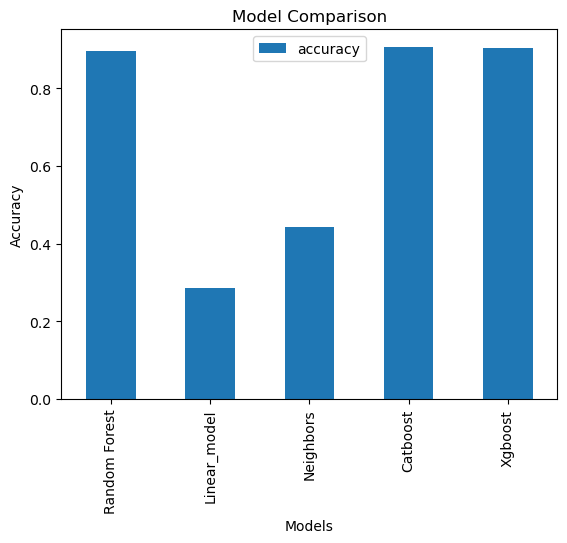

In [42]:
model_comparison=pd.DataFrame(model_scores,index=["accuracy"])
model_comparison.T.plot.bar();
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison");

### Experiment,Experiment,Experiment

In machine learning, the first score is not always the last and infact the first score can be reffered to us **Baseline score**
We can try to optimize the models and try to improve the score of the models....We really have to because we should try as much 
as possible to optimize the results 

**RandomSearchCv** on the RandomForest Model

In [58]:
from sklearn.model_selection import RandomizedSearchCV

#set the random seed 
np.random.seed(42)

#set the grid of parameters that we are going to use
grid={"n_estimators":[100,200,300,400,500],
      "max_features":["auto","sqrt"],
     "max_depth":[10,20,30,40,50,60,70,80,90,100,None],
     "min_samples_split":[2,5,10],
     "min_samples_leaf":[1,2,4],
     "bootstrap":[True,False]}

rf_rs=RandomizedSearchCV(estimator=RandomForestClassifier(),
                        param_distributions=grid,
                        cv=3,
                        n_iter=5,
                        verbose=True)

#fit the randomized search model for the data 
rf_rs.fit(X_train,y_train)

#score the model
rf_rs.score(X_test,y_test)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


0.896917148362235

In [44]:
model_scores


{'Random Forest': 0.8954720616570327,
 'Linear_model': 0.28516377649325625,
 'Neighbors': 0.44388246628131023,
 'Catboost': 0.9063102119460501,
 'Xgboost': 0.9029383429672447}

In [45]:
model=CatBoostClassifier()

#fit our best perfoming model to the data 
model.fit(X_train,y_train)
model.score(X_test,y_test)

Learning rate set to 0.091318
0:	learn: 1.6514135	total: 64.8ms	remaining: 1m 4s
1:	learn: 1.4664755	total: 98ms	remaining: 48.9s
2:	learn: 1.3267997	total: 130ms	remaining: 43.1s
3:	learn: 1.2204047	total: 161ms	remaining: 40s
4:	learn: 1.1250128	total: 194ms	remaining: 38.5s
5:	learn: 1.0519223	total: 234ms	remaining: 38.7s
6:	learn: 0.9864737	total: 265ms	remaining: 37.6s
7:	learn: 0.9291548	total: 301ms	remaining: 37.4s
8:	learn: 0.8803871	total: 336ms	remaining: 37s
9:	learn: 0.8348234	total: 374ms	remaining: 37s
10:	learn: 0.7980756	total: 419ms	remaining: 37.7s
11:	learn: 0.7625434	total: 453ms	remaining: 37.3s
12:	learn: 0.7276825	total: 484ms	remaining: 36.8s
13:	learn: 0.7004053	total: 515ms	remaining: 36.3s
14:	learn: 0.6764607	total: 547ms	remaining: 35.9s
15:	learn: 0.6509015	total: 577ms	remaining: 35.5s
16:	learn: 0.6295773	total: 609ms	remaining: 35.2s
17:	learn: 0.6088302	total: 644ms	remaining: 35.1s
18:	learn: 0.5904174	total: 685ms	remaining: 35.4s
19:	learn: 0.5748

166:	learn: 0.2657489	total: 5.92s	remaining: 29.5s
167:	learn: 0.2651891	total: 5.96s	remaining: 29.5s
168:	learn: 0.2647629	total: 5.98s	remaining: 29.4s
169:	learn: 0.2642576	total: 6.01s	remaining: 29.3s
170:	learn: 0.2639892	total: 6.04s	remaining: 29.3s
171:	learn: 0.2635903	total: 6.07s	remaining: 29.2s
172:	learn: 0.2630394	total: 6.1s	remaining: 29.2s
173:	learn: 0.2627258	total: 6.14s	remaining: 29.1s
174:	learn: 0.2622642	total: 6.17s	remaining: 29.1s
175:	learn: 0.2618009	total: 6.2s	remaining: 29s
176:	learn: 0.2614683	total: 6.23s	remaining: 29s
177:	learn: 0.2609990	total: 6.26s	remaining: 28.9s
178:	learn: 0.2604915	total: 6.29s	remaining: 28.8s
179:	learn: 0.2598569	total: 6.32s	remaining: 28.8s
180:	learn: 0.2595776	total: 6.35s	remaining: 28.7s
181:	learn: 0.2590954	total: 6.38s	remaining: 28.7s
182:	learn: 0.2585316	total: 6.41s	remaining: 28.6s
183:	learn: 0.2583179	total: 6.44s	remaining: 28.6s
184:	learn: 0.2580406	total: 6.47s	remaining: 28.5s
185:	learn: 0.2576

327:	learn: 0.2178373	total: 11.4s	remaining: 23.4s
328:	learn: 0.2176957	total: 11.4s	remaining: 23.3s
329:	learn: 0.2175463	total: 11.5s	remaining: 23.3s
330:	learn: 0.2173526	total: 11.5s	remaining: 23.2s
331:	learn: 0.2171703	total: 11.5s	remaining: 23.2s
332:	learn: 0.2169537	total: 11.6s	remaining: 23.2s
333:	learn: 0.2167999	total: 11.6s	remaining: 23.1s
334:	learn: 0.2166248	total: 11.6s	remaining: 23.1s
335:	learn: 0.2162714	total: 11.7s	remaining: 23s
336:	learn: 0.2159434	total: 11.7s	remaining: 23s
337:	learn: 0.2158311	total: 11.7s	remaining: 23s
338:	learn: 0.2154996	total: 11.8s	remaining: 22.9s
339:	learn: 0.2152403	total: 11.8s	remaining: 22.9s
340:	learn: 0.2150456	total: 11.8s	remaining: 22.8s
341:	learn: 0.2147972	total: 11.8s	remaining: 22.8s
342:	learn: 0.2146365	total: 11.9s	remaining: 22.8s
343:	learn: 0.2144647	total: 11.9s	remaining: 22.7s
344:	learn: 0.2142637	total: 11.9s	remaining: 22.7s
345:	learn: 0.2140518	total: 12s	remaining: 22.6s
346:	learn: 0.213714

489:	learn: 0.1881814	total: 16.5s	remaining: 17.1s
490:	learn: 0.1880711	total: 16.5s	remaining: 17.1s
491:	learn: 0.1879708	total: 16.5s	remaining: 17.1s
492:	learn: 0.1878199	total: 16.6s	remaining: 17s
493:	learn: 0.1876835	total: 16.6s	remaining: 17s
494:	learn: 0.1875107	total: 16.6s	remaining: 17s
495:	learn: 0.1873040	total: 16.6s	remaining: 16.9s
496:	learn: 0.1871389	total: 16.7s	remaining: 16.9s
497:	learn: 0.1869884	total: 16.7s	remaining: 16.8s
498:	learn: 0.1868046	total: 16.7s	remaining: 16.8s
499:	learn: 0.1866990	total: 16.8s	remaining: 16.8s
500:	learn: 0.1865596	total: 16.8s	remaining: 16.7s
501:	learn: 0.1863166	total: 16.8s	remaining: 16.7s
502:	learn: 0.1861226	total: 16.9s	remaining: 16.7s
503:	learn: 0.1859767	total: 17s	remaining: 16.7s
504:	learn: 0.1858642	total: 17s	remaining: 16.7s
505:	learn: 0.1856843	total: 17.1s	remaining: 16.7s
506:	learn: 0.1855589	total: 17.1s	remaining: 16.6s
507:	learn: 0.1853870	total: 17.1s	remaining: 16.6s
508:	learn: 0.1852943	

654:	learn: 0.1649420	total: 21.7s	remaining: 11.4s
655:	learn: 0.1647294	total: 21.8s	remaining: 11.4s
656:	learn: 0.1646101	total: 21.8s	remaining: 11.4s
657:	learn: 0.1645246	total: 21.8s	remaining: 11.3s
658:	learn: 0.1644623	total: 21.9s	remaining: 11.3s
659:	learn: 0.1643736	total: 21.9s	remaining: 11.3s
660:	learn: 0.1642426	total: 21.9s	remaining: 11.2s
661:	learn: 0.1640184	total: 21.9s	remaining: 11.2s
662:	learn: 0.1638785	total: 22s	remaining: 11.2s
663:	learn: 0.1637101	total: 22s	remaining: 11.1s
664:	learn: 0.1635644	total: 22s	remaining: 11.1s
665:	learn: 0.1634663	total: 22.1s	remaining: 11.1s
666:	learn: 0.1633195	total: 22.1s	remaining: 11s
667:	learn: 0.1632445	total: 22.1s	remaining: 11s
668:	learn: 0.1631590	total: 22.2s	remaining: 11s
669:	learn: 0.1629814	total: 22.2s	remaining: 10.9s
670:	learn: 0.1628216	total: 22.2s	remaining: 10.9s
671:	learn: 0.1627495	total: 22.2s	remaining: 10.9s
672:	learn: 0.1625179	total: 22.3s	remaining: 10.8s
673:	learn: 0.1623771	to

819:	learn: 0.1464473	total: 26.8s	remaining: 5.88s
820:	learn: 0.1463527	total: 26.8s	remaining: 5.85s
821:	learn: 0.1462168	total: 26.9s	remaining: 5.82s
822:	learn: 0.1461746	total: 26.9s	remaining: 5.78s
823:	learn: 0.1460711	total: 26.9s	remaining: 5.75s
824:	learn: 0.1459292	total: 27s	remaining: 5.72s
825:	learn: 0.1458120	total: 27s	remaining: 5.68s
826:	learn: 0.1457132	total: 27s	remaining: 5.65s
827:	learn: 0.1456549	total: 27s	remaining: 5.62s
828:	learn: 0.1455376	total: 27.1s	remaining: 5.58s
829:	learn: 0.1454585	total: 27.1s	remaining: 5.55s
830:	learn: 0.1454335	total: 27.1s	remaining: 5.52s
831:	learn: 0.1453059	total: 27.2s	remaining: 5.49s
832:	learn: 0.1452197	total: 27.2s	remaining: 5.46s
833:	learn: 0.1451431	total: 27.2s	remaining: 5.42s
834:	learn: 0.1450416	total: 27.3s	remaining: 5.39s
835:	learn: 0.1449145	total: 27.3s	remaining: 5.36s
836:	learn: 0.1448596	total: 27.3s	remaining: 5.32s
837:	learn: 0.1447804	total: 27.4s	remaining: 5.29s
838:	learn: 0.144666

981:	learn: 0.1317499	total: 31.9s	remaining: 585ms
982:	learn: 0.1316385	total: 32s	remaining: 553ms
983:	learn: 0.1315273	total: 32s	remaining: 520ms
984:	learn: 0.1314205	total: 32s	remaining: 488ms
985:	learn: 0.1313293	total: 32s	remaining: 455ms
986:	learn: 0.1312829	total: 32.1s	remaining: 423ms
987:	learn: 0.1312034	total: 32.1s	remaining: 390ms
988:	learn: 0.1311350	total: 32.1s	remaining: 357ms
989:	learn: 0.1310845	total: 32.2s	remaining: 325ms
990:	learn: 0.1310428	total: 32.2s	remaining: 292ms
991:	learn: 0.1309946	total: 32.2s	remaining: 260ms
992:	learn: 0.1309224	total: 32.3s	remaining: 227ms
993:	learn: 0.1308758	total: 32.3s	remaining: 195ms
994:	learn: 0.1308092	total: 32.3s	remaining: 162ms
995:	learn: 0.1307286	total: 32.4s	remaining: 130ms
996:	learn: 0.1306315	total: 32.4s	remaining: 97.4ms
997:	learn: 0.1306030	total: 32.4s	remaining: 65ms
998:	learn: 0.1305351	total: 32.4s	remaining: 32.5ms
999:	learn: 0.1304564	total: 32.5s	remaining: 0us


0.9063102119460501

### RandomSearchCV and GridSearchCV on our best perfoming model 

In [54]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#set the randomseed for reproducibility
np.random.seed(42)

random_grid={"learning_rate":[0.01,0.05,0.1],
            "depth":[4,6,8,10],
            "iterations":[200],
            "l2_leaf_reg":[1,3,5,7],
            "border_count":[32,64,128],
            "bagging_temperature":[0.5,1.0,1.5],
            "random_strength":[0.5,1.0,1.5]}


random_search=RandomizedSearchCV(estimator=model,
                                param_distributions=random_grid,
                                n_iter=10,
                                cv=2,
                                verbose=2,
                                n_jobs=-1)

#fit the randomsearch model to the data
random_search.fit(X_train,y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
0:	learn: 1.6190039	total: 33.2ms	remaining: 6.61s
1:	learn: 1.4149624	total: 60.6ms	remaining: 6s
2:	learn: 1.2671930	total: 88.5ms	remaining: 5.81s
3:	learn: 1.1531331	total: 115ms	remaining: 5.61s
4:	learn: 1.0552493	total: 141ms	remaining: 5.49s
5:	learn: 0.9799150	total: 167ms	remaining: 5.41s
6:	learn: 0.9162369	total: 195ms	remaining: 5.37s
7:	learn: 0.8591963	total: 221ms	remaining: 5.31s
8:	learn: 0.8119600	total: 250ms	remaining: 5.3s
9:	learn: 0.7715998	total: 288ms	remaining: 5.47s
10:	learn: 0.7326191	total: 323ms	remaining: 5.54s
11:	learn: 0.6987643	total: 351ms	remaining: 5.5s
12:	learn: 0.6679665	total: 378ms	remaining: 5.44s
13:	learn: 0.6398427	total: 405ms	remaining: 5.38s
14:	learn: 0.6169594	total: 431ms	remaining: 5.32s
15:	learn: 0.5945050	total: 457ms	remaining: 5.26s
16:	learn: 0.5748637	total: 483ms	remaining: 5.2s
17:	learn: 0.5588793	total: 515ms	remaining: 5.21s
18:	learn: 0.5423602	total: 544ms	

162:	learn: 0.2395002	total: 4.25s	remaining: 964ms
163:	learn: 0.2389708	total: 4.27s	remaining: 938ms
164:	learn: 0.2382926	total: 4.3s	remaining: 911ms
165:	learn: 0.2377915	total: 4.32s	remaining: 885ms
166:	learn: 0.2373411	total: 4.35s	remaining: 860ms
167:	learn: 0.2369822	total: 4.38s	remaining: 834ms
168:	learn: 0.2365258	total: 4.4s	remaining: 807ms
169:	learn: 0.2361777	total: 4.42s	remaining: 780ms
170:	learn: 0.2359122	total: 4.44s	remaining: 753ms
171:	learn: 0.2352761	total: 4.46s	remaining: 727ms
172:	learn: 0.2348379	total: 4.49s	remaining: 700ms
173:	learn: 0.2344810	total: 4.51s	remaining: 674ms
174:	learn: 0.2339129	total: 4.53s	remaining: 647ms
175:	learn: 0.2332915	total: 4.55s	remaining: 621ms
176:	learn: 0.2329544	total: 4.57s	remaining: 594ms
177:	learn: 0.2324860	total: 4.59s	remaining: 568ms
178:	learn: 0.2320227	total: 4.61s	remaining: 541ms
179:	learn: 0.2315665	total: 4.63s	remaining: 515ms
180:	learn: 0.2309087	total: 4.66s	remaining: 489ms
181:	learn: 0.

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002C7B1EB5E50>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.5, 1.0, 1.5],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [200],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'random_strength': [0.5, 1.0, 1.5]},
                   verbose=2)

In [59]:
random_search.best_params_

{'random_strength': 0.5,
 'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 200,
 'depth': 6,
 'border_count': 128,
 'bagging_temperature': 0.5}

In [60]:
random_search.score(X_test,y_test)

0.9026974951830443

## Making predictions

We have created a model,we have evaluated our models and certainly we have identified our best perfoming models which is the catboost classifier as the model 
we are going to bring into production

Lets now make predictions on the test data(samples from the wild) since they do not have labels

**Read in the test data**

In [ ]:
df_test=pd.read_csv("classification_test.csv")
df_test

In [ ]:
#check if the test data has any missing values 
df_test.isna().sum()

In [ ]:
#check the information about the dataset
df_test.info()

In [ ]:
#turn the categorical columns into categories 
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        #turn the categories into categorical datatypes 
        df_test[label]=content.astype("category").cat.as_ordered()

In [ ]:
df_test.info()

In [ ]:
#turn the categroies into categorical
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        #turn the categoricals into integers
        df_test[label]=pd.Categorical(content).codes

In [ ]:
df_test.info()

In [ ]:
df["Gender"].value_counts()

## Predictions
In machine learning,when making predictions you have to ensure that the data you are passing to the model has the same format to the data the model was trained on 

The test data should be **FORMATTED** to the same format the data was trained on 

In [ ]:
predictions=model.predict(df_test)
predictions

In [ ]:
df["NObeyesdad"].value_counts()


In [ ]:
classification_predictions=pd.DataFrame()
outcome_mapping = {0:"Insufficient_Weight",1:"Normal_Weight",2:"Obesity_Type_I",3:"Obesity_Type_II",4:"Obesity_Type_III",5:"Overweight_Level_I",6:"Overweight_Level_II"}
classification_predictions["id"]=df_test["id"]
classification_predictions["Output_no"]=predictions
classification_predictions["NObeyesdad"]=classification_predictions["Output_no"].map(outcome_mapping)
classification_predictions.drop("Output_no",axis=1,inplace=True)

In [ ]:
df["NObeyesdad"].value_counts()

In [ ]:
classification_predictions.to_csv("submit.csv",index=False)

In [ ]:
submit=pd.read_csv("submit.csv")
submit["NObeyesdad"].value_counts()

## Feature importance 

This is a the process of figuring out which were the most importance features in our dataset that contributed mostly to te perfomance of the model

The process of finding feature importances is called **Active learning** or **Model driven data Exploration**

In [ ]:
#create a function to plot for us a figure for the most important features of our model

def plot_features(features,importances,n=20):
    """
    Plots the most important features of the model given the features and the 
    importances 
    """
    #create a dataframe 
    df=(pd.DataFrame({"features":features,
                     "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
       .reset_index(drop=True))
    
    #Plot the figure 
    fig,ax=plt.subplots(figsize=(10,8))
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_xlabel("Feature importances")
    ax.set_ylabel("Features")

In [ ]:
plot_features(X_train.columns,model.feature_importances_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

In [ ]:
#score the model on the test data 
model.score(X_test,y_test)